<a href="https://colab.research.google.com/github/DLPietro/learning-roadmap/blob/main/notebooks/day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas Basics: DataFrame & Operations

1) Downloading data and tickers for 60 days
2) Creating dataframes with Close and Volume values.
3) Calculationg new column Daily Return using pct_change() from pandas.
4) Print first 10 rows of the new column.

In [1]:
import yfinance as yf, pandas as pd, numpy as np   # Importing them in a single row

tickers = ['IWM', 'GLD', 'IGOV']                                   # Defined tickets
data = yf.download(tickers, period = '60d')                        # Selected assets: Apple, Microsoft and Google for a peirod of 60 days
close_prices = data['Close'][['IWM', 'GLD', 'IGOV']]               # Only Closing prices
volume = data['Volume'][['IWM', 'GLD', 'IGOV']]                    # Volume Column

print(f"Last Prices Available: {close_prices.iloc[-1]}")           # Print last prices available

print(f"Last Volumes Available: {volume.iloc[-1]}")                # Print Volume for Each Asset

/tmp/ipython-input-1308569009.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period = '60d')                        # Selected assets: Apple, Microsoft and Google for a peirod of 60 days
[*********************100%***********************]  3 of 3 completed

Last Prices Available: Ticker
IWM     235.169998
GLD     318.070007
IGOV     42.410000
Name: 2025-08-29 00:00:00, dtype: float64
Last Volumes Available: Ticker
IWM     29211600
GLD     15617700
IGOV      382000
Name: 2025-08-29 00:00:00, dtype: int64


In [8]:
def calc_daily_returns(prices):
  """Calculate Daily Returns with pct_change()"""                               # Function for daily return calculation
  returns = prices.pct_change()                                                 # Function ready using pandas
  return returns

calc_daily_returns(close_prices).dropna().head(10)                              # Print frist 10 rows

Ticker,IWM,GLD,IGOV
Date,,,
2025-06-06,0.016161,-0.013416,-0.002380
2025-06-09,0.006890,0.004719,0.000239
2025-06-10,0.005390,0.000294,0.002623
2025-06-11,-0.004102,0.005412,0.002854
2025-06-12,-0.003979,0.012420,0.010199
2025-06-13,-0.018282,0.013101,-0.007044
2025-06-16,0.011790,-0.014259,0.001419
2025-06-17,-0.010533,0.000513,-0.004250
2025-06-18,0.005274,-0.005386,0.000000


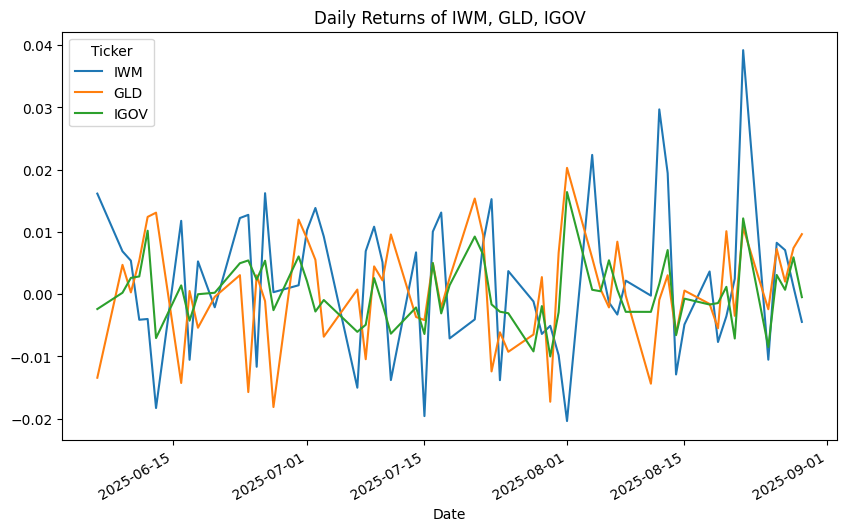

In [10]:
import matplotlib.pyplot as plt

returns = calc_daily_returns(close_prices).dropna()
returns.plot(figsize=(10,6), title="Daily Returns of IWM, GLD, IGOV")
plt.show()